# Declaration of Originality

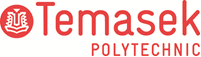

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  :
* Tutorial Group                :  
* Tutor						    :  
* Submission Date               : 


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [66]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Business Understanding
Goal: To predict whether a student is likely to experience depression.

# 2. Data Understanding

## 2.1 Load dataset

In [67]:
## Read *.csv file into pandas DataFrame
df = pd.read_csv('Student_Depression_Dataset.csv')
df = df.drop(columns=['id'])
df

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


## 2.2 Summary Statistics

In [68]:
## Understand the type of variable for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27901 non-null  object 
 1   Age                                    27901 non-null  float64
 2   City                                   27901 non-null  object 
 3   Profession                             27901 non-null  object 
 4   Academic Pressure                      27901 non-null  float64
 5   Work Pressure                          27901 non-null  float64
 6   CGPA                                   27901 non-null  float64
 7   Study Satisfaction                     27901 non-null  float64
 8   Job Satisfaction                       27901 non-null  float64
 9   Sleep Duration                         27901 non-null  object 
 10  Dietary Habits                         27901 non-null  object 
 11  De

In [69]:
## Check for missing data
df.isna().sum()

Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [70]:
## Describe data distribution
df.describe()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

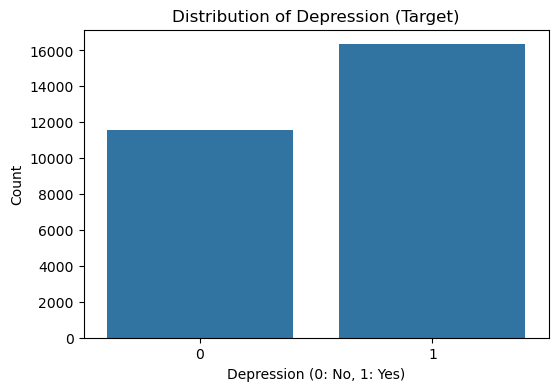

In [71]:
## Understanding distribution of target
plt.figure(figsize=(6, 4))
sns.countplot(x='Depression', data=df)
plt.title('Distribution of Depression (Target)')
plt.xlabel('Depression (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()



### 2.3.1.2 Understanding distribution of features

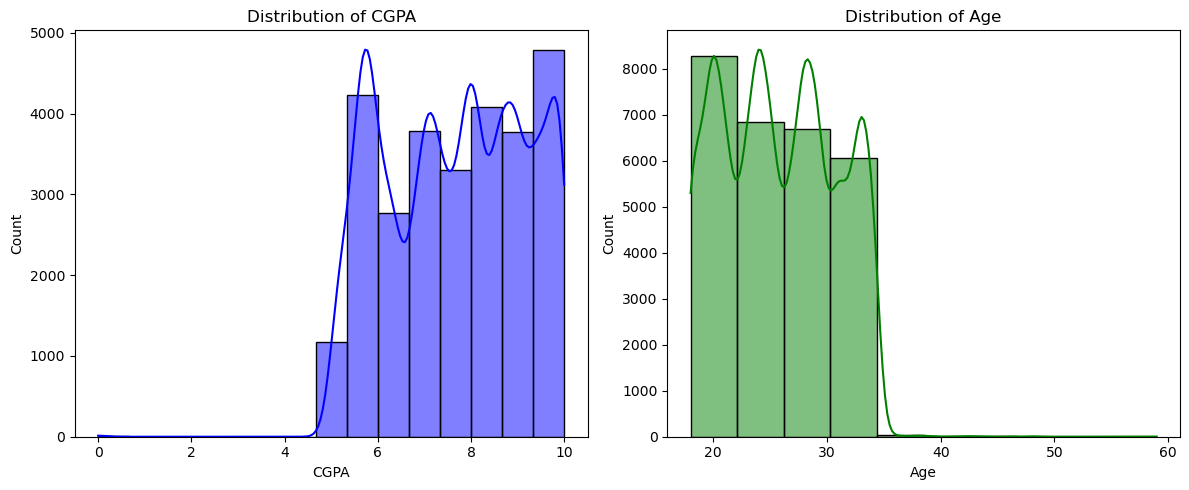

In [72]:
## Understanding distribution of features
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['CGPA'], bins=15, kde=True, color='blue')
plt.title('Distribution of CGPA')

plt.subplot(1, 2, 2)
sns.histplot(df['Age'], bins=10, kde=True, color='green')
plt.title('Distribution of Age')

plt.tight_layout()
plt.show()


### 2.3.2 Understanding relationship between variables

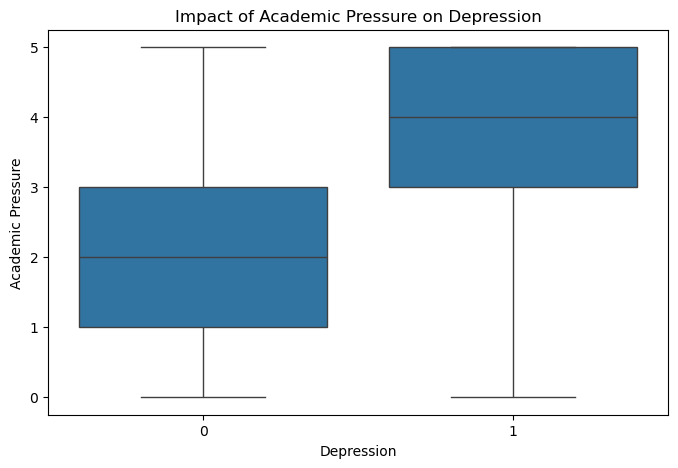

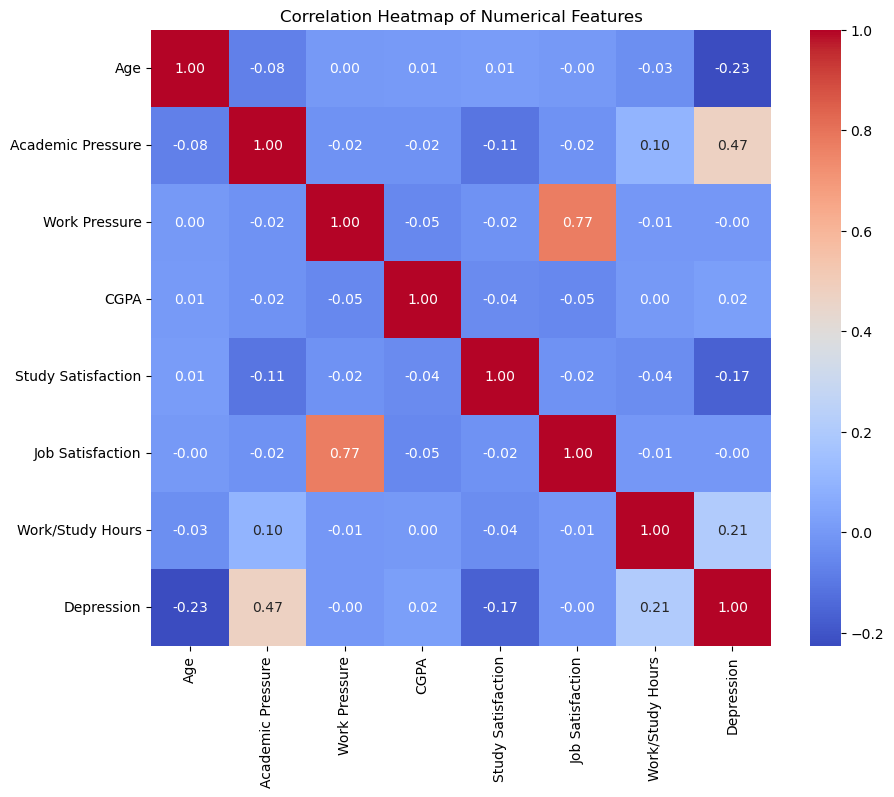

In [73]:
## Understanding relationship between variables
plt.figure(figsize=(8, 5))
sns.boxplot(x='Depression', y='Academic Pressure', data=df)
plt.title('Impact of Academic Pressure on Depression')
plt.show()

numeric_cols = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# 3. Data Preparation

## 3.1 Data Cleaning

In [74]:
## Clean data
df_encoded = pd.get_dummies(df, drop_first=True)
print(df_encoded.dtypes.value_counts())

bool       106
float64      7
int64        1
Name: count, dtype: int64


## 3.2 Train-Test Split

In [75]:
## Split data into train set and test set
col_y = 'Depression'
x = df_encoded.drop(columns=[col_y])
y = df_encoded[col_y]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

# 4. Modelling

### 4.2 Train Model

### Logistic Regression

In [76]:
## Initialise and train model
logr = LogisticRegression(max_iter=10000)
logr.fit(x_train, y_train)
y_pred = logr.predict(x_test)

### Random Forest

In [77]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)

### Gradient Boosting

In [78]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(x_train, y_train)
gb_pred = gb_model.predict(x_test)

### Decision Tree

In [79]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)
dt_pred = dt_model.predict(x_test)

# 5. Model Evaluation

In [80]:
## Evaluate model
models = {
    "Logistic Regression": y_pred,
    "Random Forest": rf_pred,
    "Gradient Boosting": gb_pred,
    "Decision Tree": dt_pred
}

results = []

for name, preds in models.items():
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, preds),
        "Precision": precision_score(y_test, preds),
        "Recall": recall_score(y_test, preds),
        "F1-Score": f1_score(y_test, preds)
    })

evaluation_df = pd.DataFrame(results)
print(evaluation_df)

                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.846016   0.856494  0.885330  0.870673
1        Random Forest  0.840162   0.847339  0.886758  0.866600
2    Gradient Boosting  0.846374   0.854342  0.889206  0.871426
3        Decision Tree  0.776251   0.809485  0.807998  0.808741


In [81]:
## New data

## Predict


## Iterative model development


In [82]:
## Further feature engineering / feature selection
cols_to_convert = ['Academic Pressure', 'Work/Study Hours', 'Study Satisfaction', 'Financial Stress']

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Check for missing values created by the conversion and drop them
df = df.dropna(subset=cols_to_convert)
df_final = df.copy()

# Add your features to df_final instead of df
df_final['Burnout_Index'] = (df_final['Academic Pressure'] * df_final['Work/Study Hours']) / (df_final['Study Satisfaction'] + 1)
df_final['Total_Stress'] = df_final['Financial Stress'] * df_final['Academic Pressure']

In [83]:
df_encoded = pd.get_dummies(df, drop_first=True)

col_y = 'Depression'
x = df_encoded.drop(columns=[col_y])
y = df_encoded[col_y]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

gb_model_final = GradientBoostingClassifier(random_state=42)
gb_model_final.fit(x_train, y_train)

# Predict on the new test set
y_pred_final = gb_model_final.predict(x_test)

# Compare results
print(f"New Accuracy: {accuracy_score(y_test, y_pred_final):.4f}")
print(f"New Recall: {recall_score(y_test, y_pred_final):.4f}")

New Accuracy: 0.8498
New Recall: 0.8904


/var/folders/3r/57z77zpd5ys8hdr56tnqrk380000gn/T/ipykernel_53530/3559856107.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='magma')


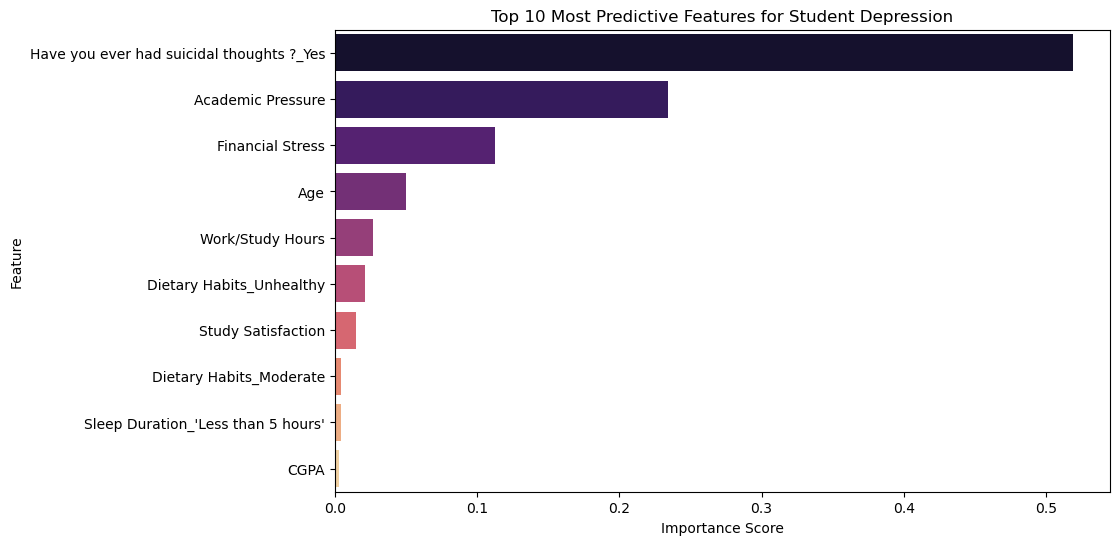

In [ ]:
# Get feature importances from your trained Gradient Boosting model
importances = gb_model_final.feature_importances_
feature_names = x_train.columns

# 2. Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 3. Visualize the Top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Most Predictive Features for Student Depression')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()